<a href="https://colab.research.google.com/github/Mackenzie2407/project/blob/main/Frozen_pizza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/frozen.csv')
df

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,25,30320,11,1,Craveables Four Cheese Pizza,79,1,frozen pizza,frozen,59897,prior,19,6,10,25.0
1,837,30320,1,1,Craveables Four Cheese Pizza,79,1,frozen pizza,frozen,89900,prior,8,6,13,7.0
2,1407,30320,5,0,Craveables Four Cheese Pizza,79,1,frozen pizza,frozen,189234,prior,5,6,14,29.0
3,8462,30320,18,1,Craveables Four Cheese Pizza,79,1,frozen pizza,frozen,179588,prior,10,5,12,8.0
4,9426,30320,8,0,Craveables Four Cheese Pizza,79,1,frozen pizza,frozen,155075,prior,12,5,20,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169874,2061856,27026,8,0,Flatbread Pizza All Natural Tomato Sauce Pizza...,79,1,frozen pizza,frozen,6301,prior,1,2,13,NaN
169875,2088007,24849,20,0,Cheese & Fresh Herb Flatbread Pizza,79,1,frozen pizza,frozen,88221,prior,3,6,14,30.0
169876,3222849,24849,11,0,Cheese & Fresh Herb Flatbread Pizza,79,1,frozen pizza,frozen,155694,prior,1,1,13,NaN
169877,3400803,24849,6,0,Cheese & Fresh Herb Flatbread Pizza,79,1,frozen pizza,frozen,152189,prior,4,3,14,2.0


In [ ]:
df.isnull().sum() #결측치 확인

order_id                      0
product_id                    0
add_to_cart_order             0
reordered                     0
product_name                  0
aisle_id                      0
department_id                 0
aisle                         0
department                    0
user_id                       0
eval_set                      0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    12024
dtype: int64

In [ ]:
df.duplicated().sum() #중복치 확인

0

In [ ]:
df.order_number.sum() #냉동피자 전체 판매량

2467304

In [ ]:
df.loc[df['product_name'].str.contains('Organic'), 'category'] = 'Organic'
df.loc[df['product_name'].str.contains('Gluten'), 'category'] = 'Gluten F'
df.loc[df['product_name'].str.contains('Lactose'), 'category'] = 'Lactose F'
df.loc[df['product_name'].str.contains('Vegan'), 'category'] = 'Vegan'
df['category'] = df['category'].fillna('General')
df.category.value_counts()

General      134084
Organic       18920
Gluten F      14755
Vegan          1916
Lactose F       204
Name: category, dtype: int64

In [ ]:
df.loc[df['product_name'].str.contains('Cheese'), 'Flavor'] = 'Cheese'
df.loc[df['product_name'].str.contains('Pepperoni'), 'Flavor'] = 'Pepperoni'
df.loc[df['product_name'].str.contains('Margherita'), 'Flavor'] = 'Margherita'
df.loc[df['product_name'].str.contains('Mushroom'), 'Flavor'] = 'Mushroom'
df.loc[df['product_name'].str.contains('Vegetable'), 'Flavor'] = 'Vegetable'
df.loc[df['product_name'].str.contains('Chicken'), 'Flavor'] = 'Chicken'
df.loc[df['product_name'].str.contains('Sausage Pizza'), 'Flavor'] = 'Sausage'
df.loc[df['product_name'].str.contains('Meat Pizza'), 'Flavor'] = 'Meat'
df.loc[df['product_name'].str.contains('Supreme'), 'Flavor'] = 'Supreme'
df['Flavor'] = df['Flavor'].fillna('etc')
df.Flavor.value_counts()

Cheese        65558
Pepperoni     40783
etc           21675
Margherita    18823
Mushroom       6562
Supreme        6446
Vegetable      4200
Sausage        2230
Chicken        2128
Meat           1474
Name: Flavor, dtype: int64

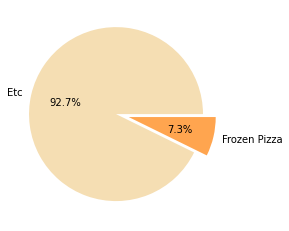

In [ ]:
import matplotlib.pyplot as plt

ratio = [2336858-169879, 169879]
labels = ['Etc', 'Frozen Pizza']
colors = ['#F5DEB3', '#FFA54F']
explode = [0.05, 0.1]
plt.pie(ratio, labels=labels, startangle=360,  explode=explode, colors=colors, autopct = '%.1f%%')
plt.show()
#냉동제품군 중 냉동 피자 점유율

In [ ]:
df['user_id'].value_counts() #순 구매자 수

105816    95
105206    81
64719     74
135222    72
72709     69
          ..
141199     1
118772     1
81199      1
198311     1
149237     1
Name: user_id, Length: 41355, dtype: int64

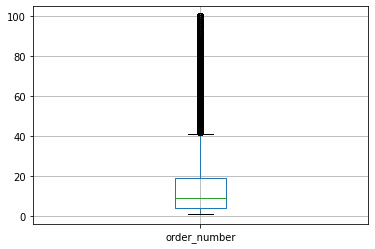

In [ ]:
df.boxplot(column='order_number') #피자 판매량 분포 확인

In [ ]:
dorder_num= df.groupby(['product_name'])[['order_number']].sum().sort_values('order_number', ascending= False)
dorder_num = dorder_num.reset_index() #전체 제품별 판매량
dorder_num

,product_name,order_number
0,Organic Cheese Frozen Pizza,275216
1,Thin Crust Pepperoni Pizza,159557
2,Cheese Pizza,107634
3,Margherita Pizza,106160
4,Four Cheese Thin Crust Pizza,98966
...,...,...
330,Cheese & Fresh Herb Flatbread Pizza,12
331,Thin & Crispy White Pizza,12
332,Flatbread Pizza All Natural Tomato Sauce Pizza...,11
333,Double Top *2X Total Meat Toppings As Our Orig...,11


In [ ]:
dnum = df['product_name'].value_counts()
dnum = dnum.to_frame().reset_index()
dnum # #전체 제품별 판매 승인수

,index,product_name
0,Organic Cheese Frozen Pizza,14851
1,Thin Crust Pepperoni Pizza,10859
2,Cheese Pizza,7315
3,Margherita Pizza,7036
4,Four Cheese Thin Crust Pizza,6345
...,...,...
330,Flatbread Pizza All Natural Tomato Sauce Pizza...,4
331,Cheese & Fresh Herb Flatbread Pizza,4
332,Double Top *2X Total Meat Toppings As Our Orig...,3
333,Thin & Crispy White Pizza,3


In [ ]:
dnum.rename(columns = {'product_name' : 'total_num'}, inplace=True)
dnum.rename(columns = {'index' : 'product_name'}, inplace=True)
dnum

,product_name,total_num
0,Organic Cheese Frozen Pizza,14851
1,Thin Crust Pepperoni Pizza,10859
2,Cheese Pizza,7315
3,Margherita Pizza,7036
4,Four Cheese Thin Crust Pizza,6345
...,...,...
330,Flatbread Pizza All Natural Tomato Sauce Pizza...,4
331,Cheese & Fresh Herb Flatbread Pizza,4
332,Double Top *2X Total Meat Toppings As Our Orig...,3
333,Thin & Crispy White Pizza,3


In [ ]:
dfnum = pd.merge(dnum, dorder_num, how='inner')
dfnum['avg'] = dfnum['order_number']/dfnum['total_num']
dfnum_2=dfnum.sort_values(by='order_number', ascending = False).head(20)
dfnum_2 # 판매량 상위 20개 피자의 1회 승인건 별 평균 판매 개수

,product_name,total_num,order_number,avg
0,Organic Cheese Frozen Pizza,14851,275216,18.531816
1,Thin Crust Pepperoni Pizza,10859,159557,14.693526
2,Cheese Pizza,7315,107634,14.714149
3,Margherita Pizza,7036,106160,15.088118
4,Four Cheese Thin Crust Pizza,6345,98966,15.597478
5,Spinach Pizza,5330,82025,15.389306
6,Pizza 4 Cheese,4609,74166,16.091560
7,Thin Crust Margherita Pizza with Fresh Mozzare...,4427,65594,14.816806
8,Organic Mushroom & Olive Pizza,3873,59637,15.398141
10,Pizza Roasted Vegetable No Cheese,3473,51256,14.758422


In [ ]:
dfnum_2.order_number.sum() #판매량 상위 20개 피자의 총 판매 개수

1481614

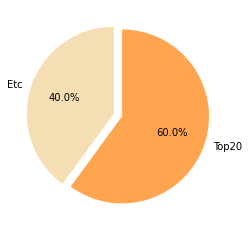

In [ ]:
import matplotlib.pyplot as plt

ratio = [2467304-1481614, 1481614]
labels = ['Etc', 'Top20']
colors = ['#F5DEB3', '#FFA54F']
explode = [0.05, 0.05]
plt.pie(ratio, labels=labels, startangle=90,  explode=explode, colors=colors, autopct = '%.1f%%')
plt.show() #전체 피자 판매 중 상위20개 피자의 판매 비중

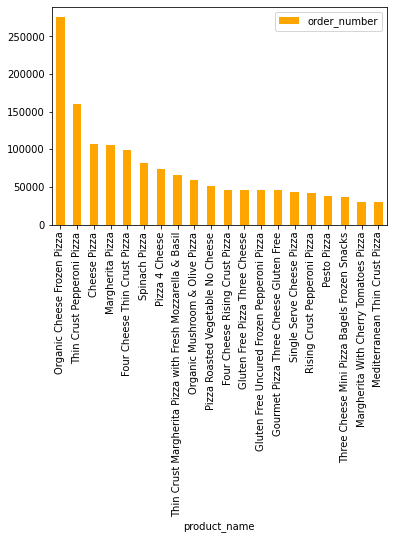

In [ ]:
dfnum2 = dfnum[['product_name', 'order_number']].sort_values(by='order_number', ascending= False).head(20)
dfnum2.set_index('product_name').plot.bar(color = 'orange') #상위 20개 제품별 판매량 분포

In [ ]:
dfnum2.set_index('product_name').index #상위 20개 제품 이름

Index(['Organic Cheese Frozen Pizza', 'Thin Crust Pepperoni Pizza',
       'Cheese Pizza', 'Margherita Pizza', 'Four Cheese Thin Crust Pizza',
       'Spinach Pizza', 'Pizza 4 Cheese',
       'Thin Crust Margherita Pizza with Fresh Mozzarella & Basil',
       'Organic Mushroom & Olive Pizza', 'Pizza Roasted Vegetable No Cheese',
       'Four Cheese Rising Crust Pizza', 'Gluten Free Pizza Three Cheese',
       'Gluten Free Uncured Frozen Pepperoni Pizza',
       'Gourmet Pizza Three Cheese Gluten Free', 'Single Serve Cheese Pizza',
       'Rising Crust Pepperoni Pizza', 'Pesto Pizza',
       'Three Cheese Mini Pizza Bagels Frozen Snacks',
       'Margherita With Cherry Tomatoes Pizza',
       'Mediterranean Thin Crust Pizza'],
      dtype='object', name='product_name')

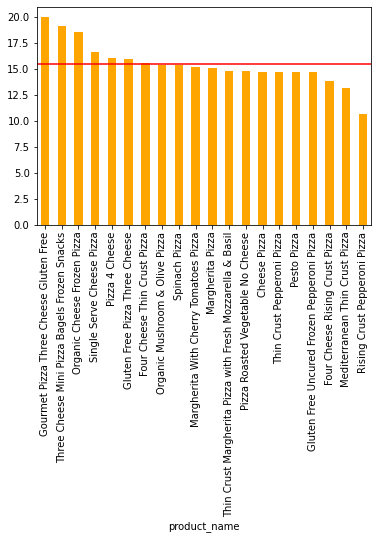

In [ ]:
#판매수 상위 20개 제품의 평균 판매량 구하기
product_list = dfnum2.set_index('product_name').index
top20 = dfnum[dfnum['product_name'].isin(product_list)].set_index('product_name')
top20['avg'].sort_values(ascending = False).plot.bar(color = 'orange')
plt.axhline(y = top20['avg'].sort_values(ascending = False).mean(), c = 'red', label = 'Mean')

In [ ]:
top20['avg'].sort_values(ascending = False).mean() #판매수 상위 20개 제품의 평균 판매

15.454976421255504

In [ ]:
not20= dfnum[~dfnum['product_name'].isin(product_list)].set_index('product_name')
not20['avg'].sort_values(ascending = False).mean() #상위 20개 제외 제품의 평균 판매량

12.280348176260642

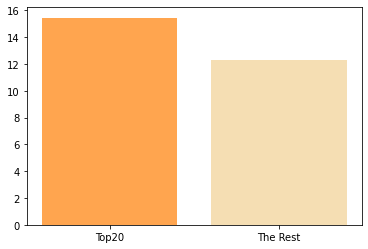

In [ ]:
contents = ['Top20', 'The Rest']
colors = ['#FFA54F','#F5DEB3']
value = [15.45, 12.28]
plt.bar(contents, value, color = colors)
plt.show()



In [ ]:
dfnum.total_num.describe() #전체 제품별 승인수 통계

count      335.000000
mean       507.101493
std       1371.342701
min          1.000000
25%         32.000000
50%         85.000000
75%        337.500000
max      14851.000000
Name: total_num, dtype: float64

In [ ]:
dfnum.order_number.describe() #전체 제품별 주문수 통계

count       335.000000
mean       7365.086567
std       22285.357382
min           4.000000
25%         358.500000
50%        1007.000000
75%        4605.000000
max      275216.000000
Name: order_number, dtype: float64

In [ ]:
df['order_number'].describe() #주문 1건당 주문 수 통계

count    169879.000000
mean         14.523891
std          15.317835
min           1.000000
25%           4.000000
50%           9.000000
75%          19.000000
max         100.000000
Name: order_number, dtype: float64

In [ ]:
over40=df[df['order_number']>=40]
over40['order_number'].sum() #1회 구매시 40개이상 구매한 제품 수의 합 (이상치)

718047

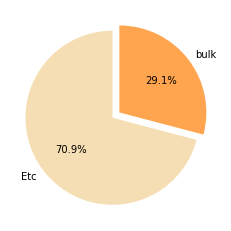

In [ ]:
import matplotlib.pyplot as plt

ratio = [2467304-718047, 718047]
labels = ['Etc', 'bulk']
colors = ['#F5DEB3', '#FFA54F']
explode = [0.05, 0.05]
plt.pie(ratio, labels=labels, startangle=90,  explode=explode, colors=colors, autopct = '%.1f%%')
plt.show() #전체 피자 판매수 중 1회 40개 이상 구매수 비중

In [ ]:
over40['reordered'].mean()

0.802002483700714

In [ ]:
under40=df[df['order_number']<40]
under40['reordered'].mean()

0.5639988534666709

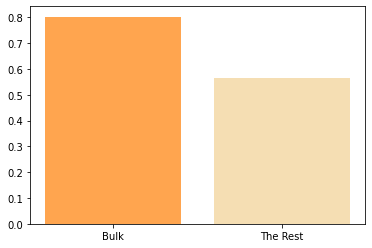

In [ ]:
contents = ['Bulk', 'The Rest']
colors = ['#FFA54F','#F5DEB3']
value = [over40['reordered'].mean(), under40['reordered'].mean()]
plt.bar(contents, value, color = colors)
plt.show()


In [ ]:
over40.isnull().sum()

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
aisle                     0
department                0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
category                  0
Flavor                    0
dtype: int64

In [ ]:
over40['days_since_prior_order'].mean()

5.557746041601987

In [ ]:
under40isnull=under40[under40['days_since_prior_order'].isnull()]
under40isnull.reordered.mean() #첫 구매에 대해서는 days_since_prior_order가 nan 값으로 잡혀있음을 확인

0.0

In [ ]:
under40['days_since_prior_order'].mean() #nan값 제외한 평균치

13.2181470776914

In [ ]:
under40[under40['days_since_prior_order'].isnull()]['order_number'].mean() #첫 구매가 이뤄질때 구매량 확인


1.0

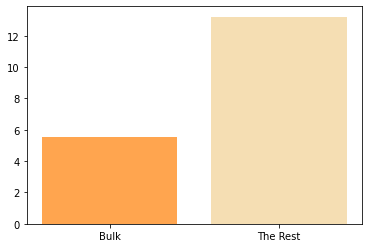

In [ ]:
contents = ['Bulk', 'The Rest']
colors = ['#FFA54F','#F5DEB3']
value = [over40['days_since_prior_order'].mean(), under40['days_since_prior_order'].mean()]
plt.bar(contents, value, color = colors)
plt.show()

In [ ]:
over40category=over40.groupby(['category'])[['order_number']].sum().sort_values('order_number', ascending= False).reset_index()
over40category #대량구매시 선호되는 피자 카테고리

,category,order_number
0,General,495968
1,Organic,125914
2,Gluten F,85962
3,Vegan,8751
4,Lactose F,1452


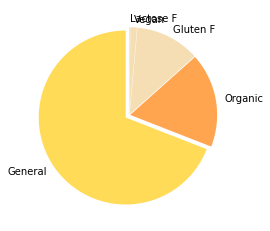

In [ ]:
colors = ['#FFDB58','#FFA54F', '#F5DEB3','#F5DEB3','#F5DEB3']

plt.pie(over40category['order_number'], labels = over40category['category'],startangle=90, colors= colors,explode = [0.05,0.01,0.01, 0.01, 0.01])
#대량구매시 선호되는 피자 카테고리 파이 차트
plt.show()

In [ ]:
under40category=under40.groupby(['category'])[['order_number']].sum().sort_values('order_number', ascending= False).reset_index()
under40category
#일반 구매시 선호되는 피자 카테고리 

,category,order_number
0,General,1360129
1,Organic,212135
2,Gluten F,155920
3,Vegan,19322
4,Lactose F,1751


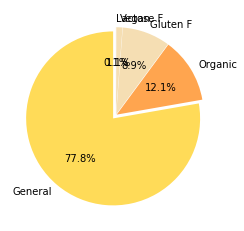

In [ ]:
colors = ['#FFDB58','#FFA54F', '#F5DEB3','#F5DEB3','#F5DEB3']

plt.pie(under40category['order_number'], labels = under40category['category'],startangle=90, autopct = '%.1f%%',colors= colors,explode = [0.05,0.01,0.01, 0.01, 0.01])
#일반 구매시 선호되는 피자 카테고리 파이 차트
plt.show()

In [ ]:
over40flavor=over40.groupby(['Flavor'])[['order_number']].sum().sort_values('order_number', ascending= False)
over40flavor = over40flavor.reset_index()
over40flavor

,Flavor,order_number
0,Cheese,339358
1,Pepperoni,131971
2,etc,90183
3,Margherita,75952
4,Mushroom,32783
5,Vegetable,18231
6,Supreme,16310
7,Sausage,5283
8,Chicken,4143
9,Meat,3833


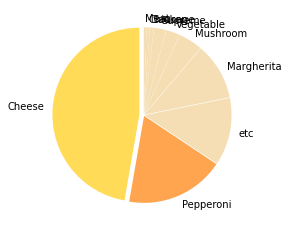

In [ ]:
colors = ['#FFDB58','#FFA54F', '#F5DEB3','#F5DEB3','#F5DEB3','#F5DEB3','#F5DEB3','#F5DEB3','#F5DEB3','#F5DEB3']

plt.pie(over40flavor['order_number'], labels = over40flavor['Flavor'],startangle=90, colors= colors,explode = [0.05,0.01,0.01, 0.01, 0.01,0.01,0.01,0.01,0.01,0.01])
plt.show()

In [ ]:
under40flavor=under40.groupby(['Flavor'])[['order_number']].sum().sort_values('order_number', ascending= False).reset_index()
under40flavor

,Flavor,order_number
0,Cheese,696324
1,Pepperoni,409304
2,etc,218026
3,Margherita,197135
4,Mushroom,69678
5,Supreme,59267
6,Vegetable,43025
7,Sausage,21968
8,Chicken,20159
9,Meat,14371


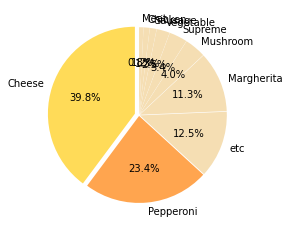

In [ ]:
colors = ['#FFDB58','#FFA54F', '#F5DEB3','#F5DEB3','#F5DEB3','#F5DEB3','#F5DEB3','#F5DEB3','#F5DEB3','#F5DEB3']

plt.pie(under40flavor['order_number'], labels = under40flavor['Flavor'],startangle=90, autopct = '%.1f%%', colors= colors,explode = [0.05,0.01,0.01, 0.01, 0.01,0.01,0.01,0.01,0.01,0.01])
plt.show()

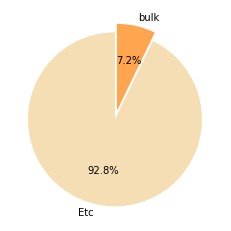

In [ ]:
import matplotlib.pyplot as plt

ratio = [169879-12191, 12191]
labels = ['Etc', 'bulk']
colors = ['#F5DEB3', '#FFA54F']
explode = [0.05, 0.05]
plt.pie(ratio, labels=labels, startangle=90,  explode=explode, colors=colors, autopct = '%.1f%%')
plt.show() #전체 피자 판매 승인수 중 1회 40개 이상 승인 수 비중

In [ ]:
over40.order_number.sum() 

718047

,order_number
product_name,
Organic Cheese Frozen Pizza,105477
Thin Crust Pepperoni Pizza,44101
Cheese Pizza,32245
Four Cheese Thin Crust Pizza,30893
Margherita Pizza,29231
Spinach Pizza,26297
Pizza 4 Cheese,25270
Thin Crust Margherita Pizza with Fresh Mozzarella & Basil,20626
Gourmet Pizza Three Cheese Gluten Free,20104


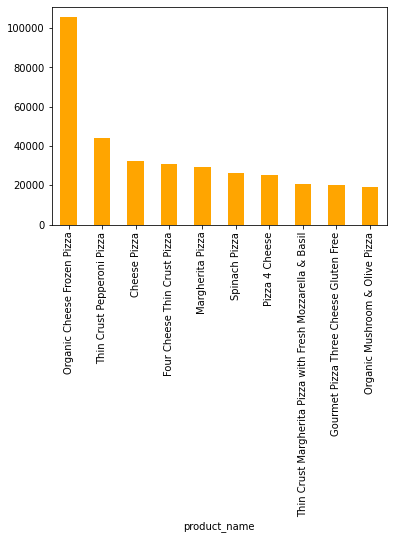

In [ ]:
over40top10=over40.groupby(['product_name'])[['order_number']].sum().sort_values('order_number', ascending= False).head(10)
over40top10['order_number'].plot.bar(color='orange')
over40top10['order_number'].sum()
over40top10

In [ ]:
over40top10['order_number'].sum()/over40.order_number.sum() 

0.4921975859518945

In [ ]:
over40ana = over40.groupby(['product_name','category', 'Flavor'])[['order_number']].sum().sort_values('order_number', ascending= False).head(10)
over40anari = over40ana.reset_index()
over40anari

,product_name,category,Flavor,order_number
0,Organic Cheese Frozen Pizza,Organic,Cheese,105477
1,Thin Crust Pepperoni Pizza,General,Pepperoni,44101
2,Cheese Pizza,General,Cheese,32245
3,Four Cheese Thin Crust Pizza,General,Cheese,30893
4,Margherita Pizza,General,Margherita,29231
5,Spinach Pizza,General,etc,26297
6,Pizza 4 Cheese,General,Cheese,25270
7,Thin Crust Margherita Pizza with Fresh Mozzare...,General,Margherita,20626
8,Gourmet Pizza Three Cheese Gluten Free,Gluten F,Cheese,20104
9,Organic Mushroom & Olive Pizza,Organic,Mushroom,19177


In [ ]:
o40order_num= over40.groupby(['product_name'])[['order_number']].sum().sort_values('order_number', ascending= False)
d40order_num = o40order_num.reset_index() #bulk 전체 제품별 판매량
d40order_num

,product_name,order_number
0,Organic Cheese Frozen Pizza,105477
1,Thin Crust Pepperoni Pizza,44101
2,Cheese Pizza,32245
3,Four Cheese Thin Crust Pizza,30893
4,Margherita Pizza,29231
...,...,...
251,Rising Crust Spinach Mushroom & Garlic Pizza,40
252,Deep Dish Singles Cheese Pizza,40
253,Pizza Five Cheese,40
254,Pizzeria Thin Crust Primo Pepperoni Pizza,40


In [ ]:
d40num = over40['product_name'].value_counts()
d40num = d40num.to_frame().reset_index()
d40num # bulk 전체 제품별 판매 승인수

,index,product_name
0,Organic Cheese Frozen Pizza,1852
1,Thin Crust Pepperoni Pizza,788
2,Cheese Pizza,587
3,Four Cheese Thin Crust Pizza,558
4,Margherita Pizza,540
...,...,...
251,Deep Dish Singles Cheese Pizza,1
252,Supreme Speciale Pizza Thin Crust,1
253,BBQ Recipe Chicken with Bacon Hand-Tossed Styl...,1
254,4 Pull-Apart Dipping Strips Pepperoni with Mar...,1


In [ ]:
d40num.rename(columns = {'product_name' : 'total_num'}, inplace=True)
d40num.rename(columns = {'index' : 'product_name'}, inplace=True)
d40num

,product_name,total_num
0,Organic Cheese Frozen Pizza,1852
1,Thin Crust Pepperoni Pizza,788
2,Cheese Pizza,587
3,Four Cheese Thin Crust Pizza,558
4,Margherita Pizza,540
...,...,...
251,Deep Dish Singles Cheese Pizza,1
252,Supreme Speciale Pizza Thin Crust,1
253,BBQ Recipe Chicken with Bacon Hand-Tossed Styl...,1
254,4 Pull-Apart Dipping Strips Pepperoni with Mar...,1


In [ ]:
df40num = pd.merge(d40num, d40order_num, how='inner')
df40num['avg'] = df40num['order_number']/df40num['total_num']
df40num_2=df40num.sort_values(by='order_number', ascending = False).head(10)
df40num_2.sort_values(by='avg', ascending=False) # 판매량 상위 10개 피자의 1회 승인건 별 평균 판매 개수

,product_name,total_num,order_number,avg
9,Gourmet Pizza Three Cheese Gluten Free,342,20104,58.783626
7,Thin Crust Margherita Pizza with Fresh Mozzare...,355,20626,58.101408
0,Organic Cheese Frozen Pizza,1852,105477,56.953024
6,Pizza 4 Cheese,447,25270,56.532438
1,Thin Crust Pepperoni Pizza,788,44101,55.965736
5,Spinach Pizza,472,26297,55.713983
8,Organic Mushroom & Olive Pizza,346,19177,55.424855
3,Four Cheese Thin Crust Pizza,558,30893,55.363799
2,Cheese Pizza,587,32245,54.931857
4,Margherita Pizza,540,29231,54.131481


In [ ]:
df40num_2['avg'].mean()

56.190220866545566

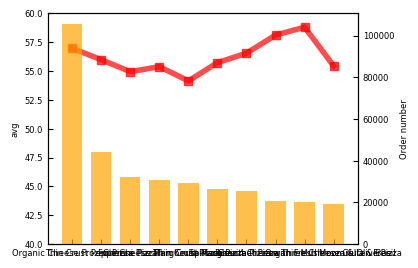

In [ ]:
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 6

# 2. 데이터 준비
x = df40num_2['product_name']
y2 = df40num_2['order_number']
y1 = df40num_2['avg']

# 3. 그래프 그리기
fig, ax1 = plt.subplots()

ax1.plot(x, y1, '-s', color='red', markersize=6, linewidth=4, alpha=0.7, label='Average')
ax1.set_ylim(40, 60)

ax1.set_ylabel('avg')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='orange',  alpha=0.7, width=0.7)
ax2.set_ylabel(r'Order number')
ax2.tick_params(axis='y', direction='in')

plt.show()

In [ ]:
df40num_2['product_name']

0                          Organic Cheese Frozen Pizza
1                           Thin Crust Pepperoni Pizza
2                                         Cheese Pizza
3                         Four Cheese Thin Crust Pizza
4                                     Margherita Pizza
5                                        Spinach Pizza
6                                       Pizza 4 Cheese
7    Thin Crust Margherita Pizza with Fresh Mozzare...
9               Gourmet Pizza Three Cheese Gluten Free
8                       Organic Mushroom & Olive Pizza
Name: product_name, dtype: object

In [ ]:
under40.user_id.nunique() #대량구매자 수

40476

In [ ]:
over40id=over40['user_id'].value_counts().to_frame().reset_index()
over40id.rename(columns = {'user_id' : 'num'}, inplace=True)
over40id.rename(columns = {'index' : 'user_id'}, inplace=True)
userlist=over40id.set_index('user_id').index
userlist #대량구매자 userid 추출

Int64Index([ 32373, 161568, 170941, 182401, 135222, 161200, 113995,  77235,
             95188,  49934,
            ...
             83326,  79708, 202347, 192558, 140969, 146312,  38756,  21574,
              2735,  40756],
           dtype='int64', name='user_id', length=3238)

In [ ]:
df5 = pd.read_csv('/content/drive/MyDrive/orders.csv')
df5

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [ ]:
heavyuser = df5[df5['user_id'].isin(userlist)]
heavyuser #대량구매자 구매 내역 추출 - 1

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
5452,3096235,327,prior,1,3,11,NaN
5453,660592,327,prior,2,0,15,4.0
5454,209959,327,prior,3,3,10,3.0
5455,2581781,327,prior,4,1,12,5.0
5456,1224477,327,prior,5,6,8,5.0
...,...,...,...,...,...,...,...
3420745,1627747,206193,prior,38,5,11,5.0
3420746,85598,206193,prior,39,1,16,3.0
3420747,619826,206193,prior,40,4,10,3.0
3420748,452589,206193,prior,41,0,15,3.0


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/aisles.csv')
df2 = pd.read_csv('/content/drive/MyDrive/departments.csv')
df3 = pd.read_csv('/content/drive/MyDrive/order_products__prior.csv')
df4 = pd.read_csv('/content/drive/MyDrive/order_products__train.csv')
df6 = pd.read_csv('/content/drive/MyDrive/products.csv')

In [ ]:
df1_ = pd.merge(df6, df1, how='inner', on=None)
df2_ = pd.merge(df1_, df2, how='inner', on=None)
df34 = pd.concat([df3, df4], axis=0)
df3_ = pd.merge(df34, df2_, how='inner', on=None)
df3_ #데이터프레임 합치기

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,26,33120,5,0,Organic Egg Whites,86,16,eggs,dairy eggs
2,120,33120,13,0,Organic Egg Whites,86,16,eggs,dairy eggs
3,327,33120,5,1,Organic Egg Whites,86,16,eggs,dairy eggs
4,390,33120,28,1,Organic Egg Whites,86,16,eggs,dairy eggs
...,...,...,...,...,...,...,...,...,...
33819101,2269288,27499,31,0,Non-Dairy Coconut Seven Layer Bar,100,21,missing,missing
33819102,2507248,27499,9,0,Non-Dairy Coconut Seven Layer Bar,100,21,missing,missing
33819103,2271346,37703,15,0,Ultra Sun Blossom Liquid 90 loads Fabric Enhan...,75,17,laundry,household
33819104,3004244,43725,25,0,Sweetart Jelly Beans,100,21,missing,missing


In [ ]:
heavyuserdf = pd.merge(df3_, heavyuser, how='inner', on=None)
heavyuserdf #대량구매자 구매 내역 추출 완성

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,390,33120,28,1,Organic Egg Whites,86,16,eggs,dairy eggs,166654,prior,48,0,12,9.0
1,390,31717,17,1,Organic Cilantro,16,4,fresh herbs,produce,166654,prior,48,0,12,9.0
2,390,33198,7,1,Sparkling Natural Mineral Water,115,7,water seltzer sparkling water,beverages,166654,prior,48,0,12,9.0
3,390,8575,12,1,Unprocessed American Singles Colby-Style Cheese,21,16,packaged cheese,dairy eggs,166654,prior,48,0,12,9.0
4,390,19660,1,1,Spring Water,115,7,water seltzer sparkling water,beverages,166654,prior,48,0,12,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2498022,709090,10382,1,0,Spirulina Pacifica Powder,47,11,vitamins supplements,personal care,4543,prior,39,6,10,5.0
2498023,2565580,34384,1,0,DM Max,11,11,cold flu allergy,personal care,44629,prior,13,1,15,3.0
2498024,2565580,34342,2,0,Warming Honey Lemon Sore Throat Spray,11,11,cold flu allergy,personal care,44629,prior,13,1,15,3.0
2498025,3326051,29332,1,0,Combination Padlock,87,17,more household,household,173443,prior,2,1,18,3.0


In [ ]:
hf = heavyuserdf[heavyuserdf['aisle']=='frozen pizza']
hf['add_to_cart_order'].value_counts(normalize=True).head(12).sum() #대량 구매자 구매패턴 - 카트에 넣는 순서

0.7628494970932915

In [ ]:
heavyuserdf.groupby(['order_id'])[['add_to_cart_order']].max() #대량구매자가 1회 구매시 사는 품목의 평균 개수 = 11.93 품목
heavyuserdf.groupby(['order_id'])[['add_to_cart_order']].max().mean()

add_to_cart_order    11.931046
dtype: float64

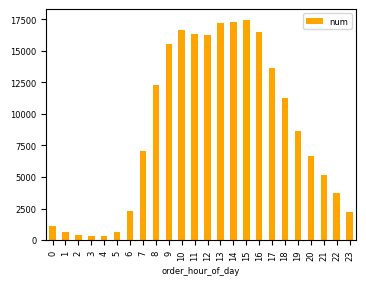

In [ ]:
htime = heavyuserdf.groupby(['order_id'])[['order_hour_of_day']].first().reset_index()

hdtime = htime['order_hour_of_day'].value_counts().to_frame().reset_index()
hdtime.rename(columns = {'order_hour_of_day' : 'num'}, inplace=True)
hdtime.rename(columns = {'index' : 'order_hour_of_day'}, inplace=True)
hdtime2 = hdtime.set_index('order_hour_of_day')
hdtime2.sort_values(by='order_hour_of_day').plot.bar(color = 'orange') #대량구매자들의 구매가 이루어지는 시간대 분포

In [ ]:
hdtime2.num.head(3).sum()/hdtime2.num.sum() #전체 시간 대비 프라임 시간의 비중

0.24784116309726228

In [ ]:
hday = heavyuserdf.groupby(['order_id'])[['order_dow']].first().reset_index()

hday2 = hday['order_dow'].value_counts().to_frame().reset_index()
hday2.rename(columns = {'order_dow' : 'num'}, inplace=True)
hday2.rename(columns = {'index' : 'order_dow'}, inplace=True)
hday3 = hday2.set_index('order_dow')
hday4 = hday3.sort_values(by='order_dow').reset_index()#대량구매자들의 구매가 이루어지는 요일 분포
hday4

,order_dow,num
0,0,36006
1,1,34236
2,2,28111
3,3,27306
4,4,27366
5,5,28059
6,6,28288


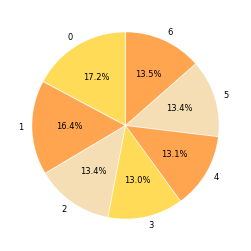

In [ ]:
colors = ['#FFDB58','#FFA54F', '#F5DEB3','#FFDB58','#FFA54F', '#F5DEB3', '#FFA54F']

plt.pie(hday4['num'], labels = hday4['order_dow'],startangle=90, autopct = '%.1f%%', colors= colors,explode = [0.01,0.01,0.01, 0.01, 0.01,0.01,0.01])
plt.show()

In [ ]:
over40edit= heavyuser[['order_dow', 'order_hour_of_day']].value_counts().to_frame().reset_index()
over40edit.rename(columns = {0 : 'num'}, inplace=True)
over40edit.head(3) #heavyuser의 요일과 시간대별 승인 건수

,order_dow,order_hour_of_day,num
0,0,13,3233
1,0,14,3192
2,0,15,3108


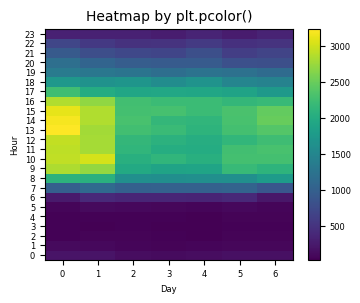

In [ ]:
dfpivot=pd.pivot_table(over40edit, index='order_hour_of_day', columns = 'order_dow', values='num')
plt.pcolor(dfpivot)

plt.xticks(np.arange(0.5, len(dfpivot.columns), 1), dfpivot.columns)
plt.yticks(np.arange(0.5, len(dfpivot.index), 1), dfpivot.index)
plt.title('Heatmap by plt.pcolor()', fontsize=10)
plt.xlabel('Day', fontsize=6)
plt.ylabel('Hour', fontsize=6)
plt.colorbar()

plt.show() #요일과 시간대별 구매 회수 히트맵

In [ ]:
preorder= heavyuserdf[['add_to_cart_order', 'aisle','product_name']]
preorder1 = preorder[preorder['add_to_cart_order']==1]
preorder11 = preorder1.product_name.value_counts().head(50).to_frame().reset_index()
preorder11.rename(columns = {'product_name' : '1st'}, inplace=True)
preorder11.rename(columns = {'index' : 'product_name'}, inplace=True)
preorder11 #가장 먼저 구매된 제품 승인 건수

,product_name,1st
0,Banana,7339
1,Bag of Organic Bananas,5586
2,Organic Strawberries,2551
3,Organic Whole Milk,2382
4,Organic Hass Avocado,1859
5,Organic Avocado,1206
6,Organic Baby Spinach,1174
7,Organic Raspberries,1074
8,Organic Reduced Fat Milk,1000
9,Spring Water,850


In [ ]:
beforemerge = heavyuserdf.groupby(['product_name','department'])[['aisle']].first()
aftermerge = pd.merge( beforemerge,preorder11, how='inner', on='product_name')
aftermerge2 = aftermerge.sort_values(by='1st', ascending=False).reset_index()
aftermerge2.drop(columns='index', axis=1, inplace=True)
aftermerge2

,product_name,aisle,1st
0,Banana,fresh fruits,7339
1,Bag of Organic Bananas,fresh fruits,5586
2,Organic Strawberries,fresh fruits,2551
3,Organic Whole Milk,milk,2382
4,Organic Hass Avocado,fresh fruits,1859
5,Organic Avocado,fresh fruits,1206
6,Organic Baby Spinach,packaged vegetables fruits,1174
7,Organic Raspberries,packaged vegetables fruits,1074
8,Organic Reduced Fat Milk,milk,1000
9,Spring Water,water seltzer sparkling water,850


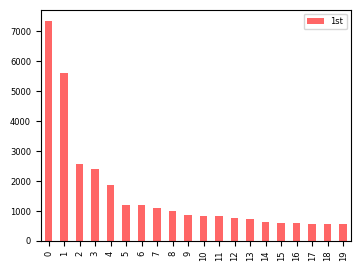

In [ ]:
aftermerge2[['product_name', '1st']].sort_values(by='1st', ascending=False).head(20).plot.bar(color='red', alpha=0.6) #첫구매 구매건수 많은 제품 순

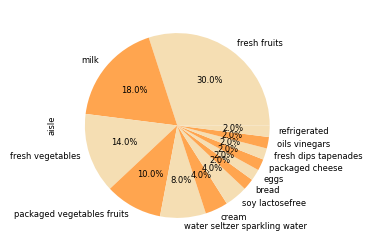

In [ ]:
colors = ['#F5DEB3', '#FFA54F', '#F5DEB3', '#FFA54F', '#F5DEB3', '#FFA54F', '#F5DEB3', '#FFA54F', '#F5DEB3', '#FFA54F', '#F5DEB3', '#FFA54F','#F5DEB3']
aftermerge2.aisle.value_counts().plot.pie(colors=colors, autopct = '%.1f%%') #첫 구매 제품군 비중